<a href="https://colab.research.google.com/github/ferreiramar96/Analise_Risco_de_Credito_Nubank/blob/main/Avalia%C3%A7%C3%A3o_de_Risco_Cr%C3%A9dito_Nubank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Risco de Crédito - Nubank


Uma das área que mais causa problemas para bancos, financiadoras e empresários é a taxa de inadimplência por parte da sua carteira de clientes. Avaliar se uma pessoa irá deixar de cumprir com suas obrigações financeiras é de extrema importância, e pode causar um grande impacto no balanço da Instituição. Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de *default*.

*Default* é o termo utilizado para indicado o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.

<p align=center>
  <img src="https://raw.githubusercontent.com/ferreiramar96/Analise_Risco_de_Credito_Nubank/main/Imagens/capa.png" width="85%">
</p>

Grandes bancos e Fintechs têm apostado cada vez mais em modelos de *Machine Learning* para previnir a inadimplência de alguns clientes. Dentre as principais instituições financeira, o [Nubank](https://nubank.com.br/sobre-nos) é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela Startup a fim de revelar talentos e potenciais contratações pela Fintech.

Neste problema, o objetivo é prever qual a probabilidade (problema de Classificação) de um cliente da Startup Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito, se tornando um cliente Default. Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).


  
Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).

*---------------------------------------------------------------------------------------------------------------------------------------------------------*

### Objetivos

> Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.

> Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.

## Importar os Dados

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.

In [1]:
!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [2]:
#Importando os pacotes necessários
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import missingno as msno
import scikitplot as skplt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, recall_score, roc_auc_score
from scikitplot.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

#Setando o pandas
pd.options.display.max_columns = None

#Random seed
np.random.seed(42)

#Filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

Em cima, importei todos os pacotes que serão necessários para este projeto.

In [3]:
#Importando os dados
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

Primeiro passo que precisamos fazer, é ver quais são as dimensões de nossos dados(linhas e colunas).

In [4]:
#Verificando a dimensão de nosso dataframe
print("DIMENSÃO DO DATAFRAME:")
print("---------------------")
print(f"Linhas: {df.shape[0]}")
print(f"Colunas: {df.shape[1]}")

DIMENSÃO DO DATAFRAME:
---------------------
Linhas: 45000
Colunas: 43


Com nossos dados importados e sabendo que nossos dados possuem 45.000 linhas e 43 colunas, a seguir irei pegar o nome de todas as colunas e colocarei um dicionário de váriaveis, explicando o que cada variável significa.

### Dicionário de Variáveis

* `ids` - Identificação única do cliente

* `target_default` - Variável-alvo, indica se o cliente foi inadimplente (`True`) ou não (`False`)

* `score_3, score_4, score_5, score_6` - Não identificadas

* `risk_rate` - Pontuação de risco

* `last_amount_borrowed` - Valor total do último empréstimo/crédito concedido

* `last_borrowed_in_months` - Quando foi feito o último empréstimo (em meses)

* `credit_limit` - Limite de crédito

* `income` - Renda do cliente

* `facebook_profile` - Pessoa tem perfil no Facebook? Sim (`True`)/Não (`False`)

* `application_time_applied` - Hora que aplicou a solicitação

* `application_time_in_funnel` - Posição do cliente no funil de vendas no momento da aplicação

* `email` - Provedor de e-mail do cliente

* `external_data_provider_fraud_score` - Pontuação de score

* `lat_lon` - Localização do cliente (latitude e longitude)

* `marketing_channel` - Canal pelo qual o cliente fez a aplicação

* `profile_phone_number` - Número de telefone

* `reported_income` - Valor da renda informado pelo cliente

* `shipping_state` - Local de entrega do cartão

* `shipping_zip_code` - Código postal para envio do cartão

* `user_agent`- Tipo de aparelho que o usuário está utilizando (se é PC, celular, marca, sistema operacional, etc.)

* `target_fraud` - variável-alvo, indica se o cliente foi fraudado

* `channel, job_name, profile_tags, real_state, reason, score_1, score_2, state, zip` - Todas essas variáveis estão anonimizadas (uma técnica de processamento de dados que remove ou modifica informações que possam identificar uma pessoa)

* `external_data_provider_credit_checks_last_2_year | external_data_provider_credit_checks_last_month | external_data_provider_credit_checks_last_year | external_data_provider_email_seen_before | external_data_provider_first_name | n_accounts | n_bankruptcies | n_issues | ok_since` - Demais variáveis que não são tão relevantes.

Agora com nosso dicionário de variáveis em mãos, vamos vizualizar as 3 primeiras entradas de nossos dados, para conhecermos um pouco mais sobre eles.

In [5]:
#3 primeiras entradas
df.head(4)

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN


## Análise Exploratória dos Dados

Como disse ali em cima, existem algumas variáveis que estão com as informações anonimizados, por serem dados de clientes reais do banco.

Nosso próximo passo é ver mais algumas informações como: tipos de nossas 43 variáveis, e se existem valores nulos.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

Ao observarmos, conseguimos concluir que:

* Existem muitas variáveis que possuem valores nulos.

* `target_default` e `facebook_profile` são do tipo `object`, porém eles deveriam ser do tipo `bool`. Precisamos fazer um tratamento nos dados antes de transforma-los, pois existem valores nulos.

* `application_time_applied` está no tipo `object` e deveria ser `datetime`(HH:mm:ss), porém o Scikit Learn não aceita esse formato, por conta disso iremos ignorar.

Algumas possíveis *Features Engineers*:

* `lat_lon` com essa variável conseguimos pegar tanto a Longitude quanto a Longitude e separa-las em variáveis diferentes.

* `shipping_state` contém a sigla do país e do estado.

Como sabemos que temos muitos valores faltantes, iremos ver qual é a porcentagem(%) de valores ausentes em em cada variável:

In [7]:
#Verificando a porcentagem de valores ausêntes em cada variável
val_null = ((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False).round(2)
val_null

target_fraud                                        96.62
last_amount_borrowed                                66.57
last_borrowed_in_months                             66.57
ok_since                                            58.99
external_data_provider_credit_checks_last_2_year    50.28
external_data_provider_credit_checks_last_year      33.61
credit_limit                                        30.67
n_issues                                            25.65
facebook_profile                                     9.91
marketing_channel                                    7.95
job_name                                             7.41
target_default                                       7.24
external_data_provider_email_seen_before             4.96
lat_lon                                              3.03
user_agent                                           1.60
n_bankruptcies                                       1.55
n_defaulted_loans                                    1.28
reason        

Como podemos observar os resultados apresentados acima, temos nas variáveis: `target_fraud`, `last_amount_borrowed`, `last_borrowed_in_months`, `ok_since` e `external_data_provider_credit_checks_last_2_year` possuem mais de 50% de seus valores nulos, o que são valores significativos. E para criarmos nosso modelo de Machine Learning, não é possível que exista valores ausêntes.

Então para isso, irei realizar um tratamento de valores nulos, não será possível realizar isso em todas as variáveis, pois pelo o que é possível observar, existem valores que são do tipo `object`.

Acredito também que mais à frente irei excluir a coluna `target_fraud`, isso por que não é uma variável relevante para nós. A coluna que iremos utilizar como target em nosso modelo, será a `target_default`.

<Axes: >

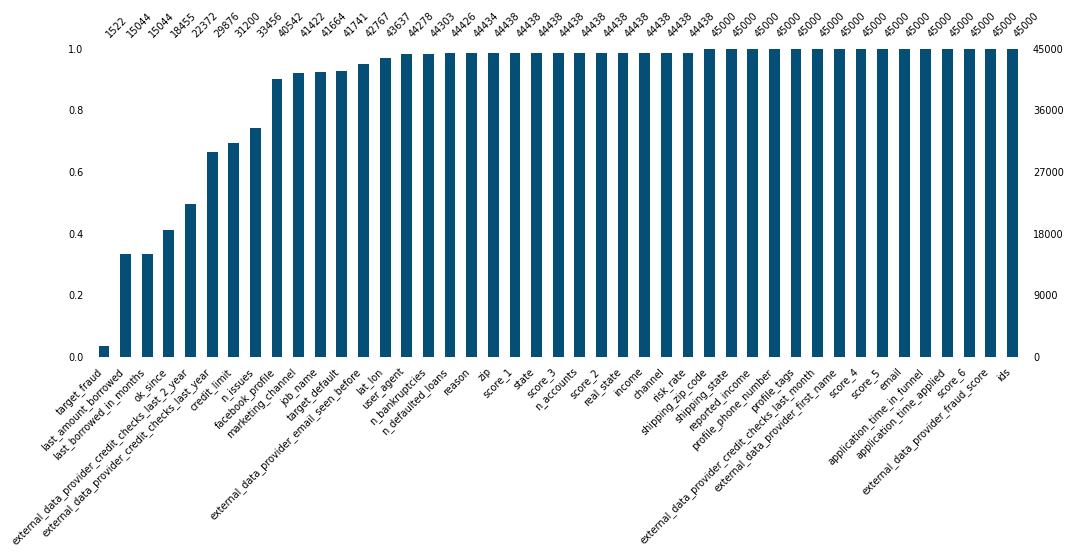

In [8]:
msno.bar(df, figsize=(12,4), fontsize=7, sort="ascending", color='#054F77')

Com a imagem fica mais fácil de vizualizarmos, a discrepância da quantidade de valores ausêntes entre os 5 primeiros, com relação às demais variáveis.

Próximo passo, irei verificar quantos valores únicos temos em cada variável

In [9]:
#Quantidade de valores únicos
df.nunique().sort_values()

external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts    

* Observando os valores acima conseguimos perceber que as variáveis `ids` e `profile_phone_number` possuem 45000 entradas distintas, isso significa que cada linha de nosso dataframe representa um cliente diferente.

* Conseguimos deduzir também que as variáveis que possuem apenas 2 valores diferentes, provavelmente elas devem conter valores como `True` e `False`, o que nos resultaria em valores booleanos. **Vale lembrar também que os valores "Nan" não são contabilizados como valores** então eles não aparecem na contagem.

* As variáveis `score_4`, `score_5` e `score_6` possuem os 45000 valores distintos também, o que podemos concluir é que eram valores únicos por cliente, porém aqui como são informações anonimizadas, iremos exclui-las mais a frente.

<br/>

Irei vizualizar quais são os valores das variáveis que possuem até 8 valores únicos, para tentar identificar alguma inconsistência nos dados.

In [10]:
#Extraindo os valores únicos
for c in df.columns:
  if df[c].nunique() < 8:
    print(f"{c}: {df[c].unique()}\n")

target_default: [False True nan]

score_1: ['1Rk8w4Ucd5yR3KcqZzLdow==' 'DGCQep2AE5QRkNCshIAlFQ=='
 '8k8UDR4Yx0qasAjkGrUZLw==' '4DLlLW62jReXaqbPaHp1vQ=='
 'e4NYDor1NOw6XKGE60AWFw==' 'smzX0nxh5QlePvtVf6EAeg=='
 'fyrlulOiZ+5hoFqLa6UbDQ==' nan]

last_borrowed_in_months: [36. nan 60.]

facebook_profile: [True False nan]

channel: ['NCqL3QBx0pscDnx3ixKwXg==' nan]

real_state: ['N5/CE7lSkAfB04hVFFwllw==' 'n+xK9CfX0bCn77lClTWviw=='
 'nSpvDsIsslUaX6GE6m6eQA==' nan 'UX7AdFYgQh+VrVC5eIaU9w=='
 '+qWF9pJpVGtTFn4vFjb/cg==']

n_bankruptcies: [ 0.  1. nan  2.  3.  4.  5.]

n_defaulted_loans: [ 0.  1. nan  2.  3.  5.]

email: ['outlook.com' 'gmail.com' 'spgov.com' 'hotmail.com' 'hotmaill.com'
 'gmaill.com']

external_data_provider_credit_checks_last_2_year: [nan  0.]

external_data_provider_credit_checks_last_month: [2 1 3 0]

external_data_provider_credit_checks_last_year: [ 0. nan  1.]

target_fraud: [nan 'fraud_friends_family' 'fraud_id']



Após obtermos esse resultado acima conseguimos ver que tudo parece estar normal, até destacarmos uma variável...a de `email`. Irei construir um gráfico para ficar visualmente mais fácil de compreender.


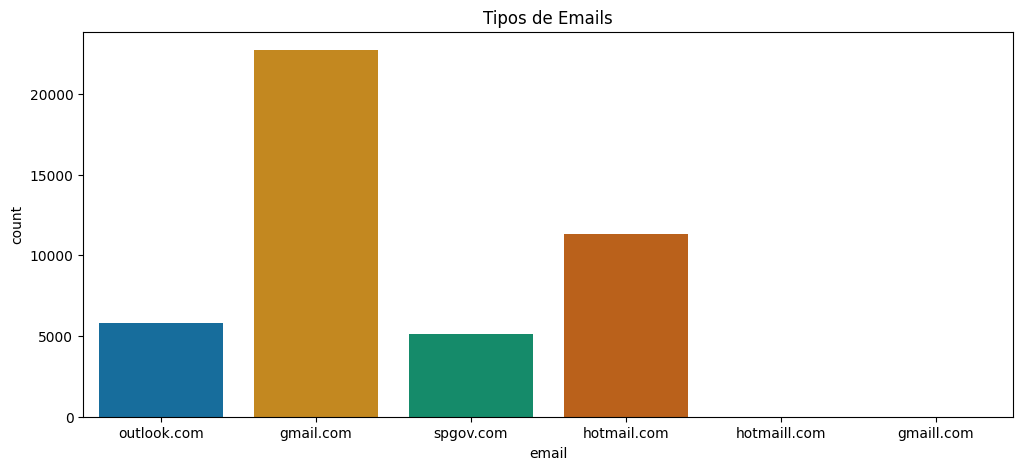

email
gmail.com       22720
hotmail.com     11333
outlook.com      5797
spgov.com        5146
hotmaill.com        3
gmaill.com          1
Name: count, dtype: int64

In [11]:
#Plotando gráfico de distribuição de "email"
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x=df['email'], palette='colorblind')
ax.set_title('Tipos de Emails')
plt.show()

#Mostrando a quantidade de cada um:
df['email'].value_counts()

Vemos que temos 2 *hotmail.com* e 2 *gmail.com*, sendo eles com dois "l", porém são muito poucos. Isso deve ter ocorrido quando o cliente foi fazer seu cadastro no Nubank, e sem querer acabaram digitando um "l" a mais. Não podemos deixar ele dessa forma, pois mais adiante irei fazer uma codificação de variáveis, e quanto mais valores tivermos maior ficará nosso conjunto de dados.

Então para evitarmos isso, mais adiante irei substituir pelos valores originais e ai sim ficará correto. Continuemos nossas análises...

<br/>

A próxima coisa que iremos fazer, será uma `análise descritiva` de todos os nossos dados numéricos, afim de descobrirmos mais informações que possam nos agregar valor e enriquecer ainda mais a análise.

In [12]:
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Com a tabela gerada acima conseguimos extrair muitas informações, vale lembrar que são apenas nossas variáveis numéricas, vamos falar de cada uma de forma separada:

* `risk_rate` - Temos uma média de 29% de risco, onde o cliente com menor risco fica em 0% e já o maior com 90% e 50% dos clientes estão na média da pontuação de risco.

* `last_amount_borrowed` - Com relação aos últimos emprestimos temos uma média de RS 13.782,00. E uma valor mínimo de RS 1005,00 porém este valor está errado, pois se olharmos a contagem temos apenas 15044 e isso significa que os outros valores são nulos, e isso significa que as pessoas não pegaram empréstimo e em vez de os valores serem 0 são NaN, então o valor mínimo é 0. Já o valor máximo é RS 35.059,00.

* `last_borrowed_in_months` - O mesmo problema que apresentei na observação acima, temos para este. A menor quantidade de meses em que o cliente fez o último emprestimo não é 36 meses como consta acima e sim 0, pois se o cliente não pegou nenhum emprestimo, consequentemente não existe tempo. Já para o maior tempo temos 60 meses.

* `credit_limit` - Aqui temos uma variáveis interessante, onde o valor médio do limite de cartão de credito dos clientes gira em torno dos RS 34.381,00 enquanto o valor máximo chega aos RS 448.269,00. Já o seu valor mínimo é igual a 0, e com isso podemos concluir que se trata de um cartão de débido.

* `income` - Temos como valor mínimo RS 4.821,00 e valor máximo RS 5.000.028.000,00 (cinco bilhões), consguimos ver que são valores extremamente distantes e com isso nossa média vai lá pra cima, ficando em RS 716.000,000 o que não corresponde a um valor de média real, e por esse motivo iremos utilizar a mediana para termos uma noção, e ela é RS 61.266,00. Um valor bem menor quando se comparado com a média.

* `reported_income` - Aqui se observarmos a média e o valor máximo, temos "inf" que significa infinito. Isso ocorre devido aos valores serem extremamente altos, então teremos que tratar essa variável.

As demais variáveis não temos muitas informações sobre elas, então não iremos dar muitas explicações sobre as mesmas. E continuaremos com nossas análises.

A seguir irei plotar alguns boxplots para darmos uma olhada nos outliers:

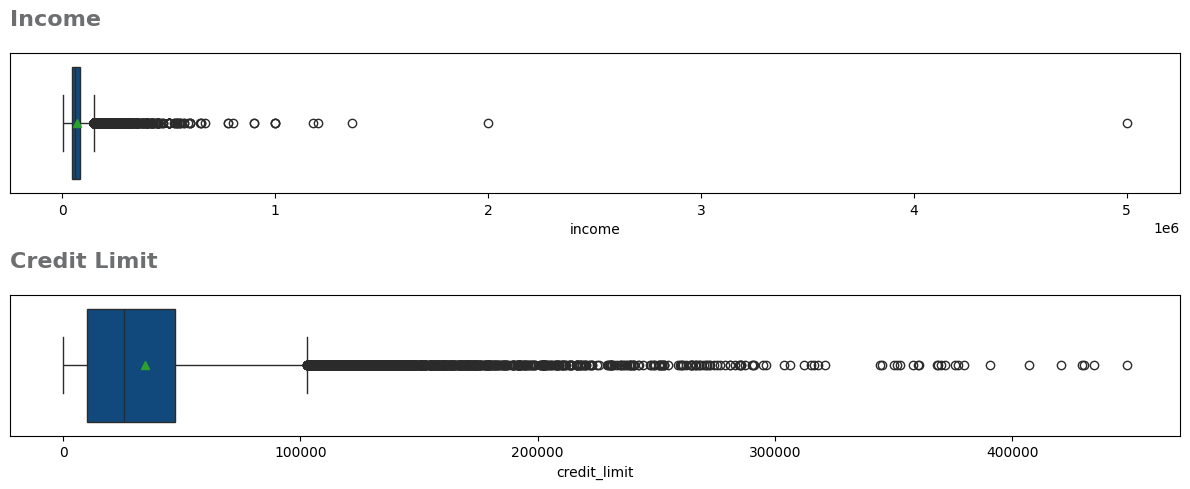

In [13]:
#Plotando BoxPlot de "income" e "credit_limit"
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 5))

# 'credit_limit'
sns.boxplot(df['income'], orient='h', showmeans=True,
            palette=['#004a8f'], ax=ax1)
ax1.set_title('Income', loc='left', fontsize=16,
              color='#6d6e70', fontweight='bold', pad=20)
ax1.set_yticks([])

# 'income'
sns.boxplot(df['credit_limit'], orient='h', showmeans=True,
            palette=['#004a8f'], ax=ax2)
ax2.set_title('Credit Limit', loc='left', fontsize=16,
              color='#6d6e70', fontweight='bold', pad=20)
ax2.set_yticks([])

plt.tight_layout();

Como podemos ver, o `Income` possuí alguns valores extremamente altos e por isso até o nosso boxplot fica com uma distorção enorme, e com isso temos a certeza de que será necessário aplicar algumas transformações para os outliers.

Já para `Credit Limit` temos valores muito altos também porém acredito que não seja nescessário remove-los, pois geralmente o limite de crédito costuma ser bem acima da renda do cliente, isso se ele possuir um bom histórico de pagador.

Para tirarmos essa dúvida, a seguir irei pegar os 5 maiores valores de limite de crédito, e iremos verificar algumas variáveis...sendo a principal delas, com relação se o cliente foi inadimplente ou não, e com isso já podemos ter uma noção se os valores *outliers* são realmente dados por engano, ou se fazem parte de uma minoria de clientes que possuem uma renda alta.

In [14]:
#Pegandos os 5 maiores limites de crédito
colunas = ['target_default', 'risk_rate', 'last_amount_borrowed','income','credit_limit']
df[colunas][df['credit_limit'].isin([448269.0, 434506.0,  430063.0,  429349.0, 420613.0])]

,target_default,risk_rate,last_amount_borrowed,income,credit_limit
7744,False,0.42,NaN,98035.41,430063.0
10588,False,0.31,NaN,75015.21,420613.0
11152,False,0.07,NaN,415018.68,429349.0
12910,False,0.24,20810.52,131912.21,434506.0
16250,False,0.17,16026.91,140012.96,448269.0


Com essa tabela, conseguimos perceber que os 5 clientes que possuem os maiores limites de crédito não foram inadimplentes. E podemos também observar que, os clientes que fizeram emprestimo e não foram *default* o banco classifica com um risco menor do que os clientes que nunca fizeram um emprestimo.

Após esta análise, podemos concluir que não será necessário fazer um tratamento de outliers em `credit_limit`.

<br>

Mais uma coisa que gostaria de dar uma olhada, seria em um boxplot de `income` removendo os 10 maiores valores, só para vermos o quão distorcido está nosso boxplot acima. E essa será uma tranformação que irei fazer de forma definitiva mais a frente, por enquanto será apenas para darmos uma olhada e comparar.

[]

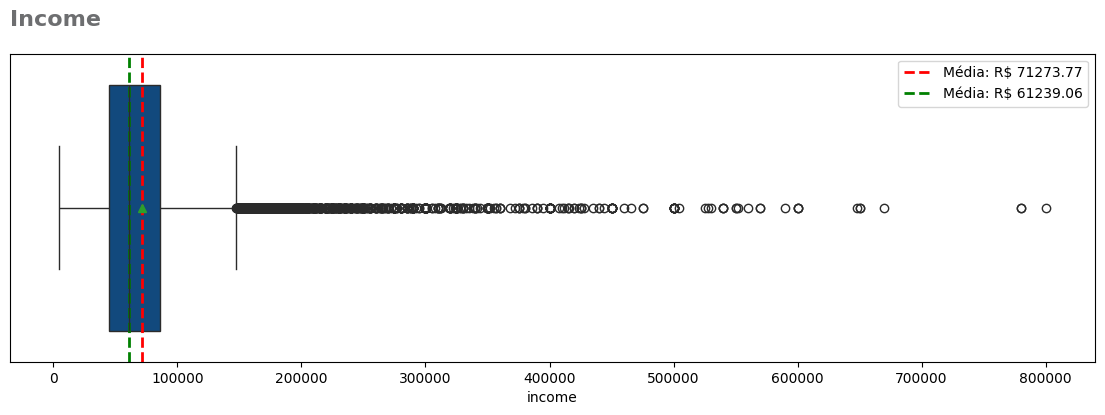

In [15]:
#Excluindo os 10 maiores valores
income_10 = df.nlargest(n=10, columns='income')
df_teste = df.copy()
df_teste = df_teste.drop(income_10.index)

#Vizualizando a distribuição dos valores
mean = df_teste['income'].mean()
median = df_teste['income'].median()

#Plotando novamente o BoxPlot de "income"
fig, ax = plt.subplots(figsize=(14, 4))

sns.boxplot(df_teste['income'], orient='h', showmeans=True,
            palette=['#004a8f'], ax=ax)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Média: R$ {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Média: R$ {median:.2f}')
plt.legend()
ax.set_title('Income', loc='left', fontsize=16,
              color='#6d6e70', fontweight='bold', pad=20)
ax.set_yticks([])

Agora sim! Conseguimos dar uma olhada melhor, e podemos ver que ainda existem cliente com renda na faixa dos RS 600.000,00. Lembrando que não alteramos de fato em nosso dataframe original, irei fazer isso quando for fazer todas as transformações necessárias.

<br>

Próximo passo é ver como está distribuída nossa classe alvo(target) que será utilizada em nosso modelo de machine learning, que será a `target_default`. Precisamos checar pois se caso uma das classes estiver superior a outra, será necessário balancea-las para que fiquem igualmente distribuídas.

Isso por que se não balancearmos, ela irá influenciar e muito nos resultados de nossos modelos, e assim não será um modelo nada eficaz.

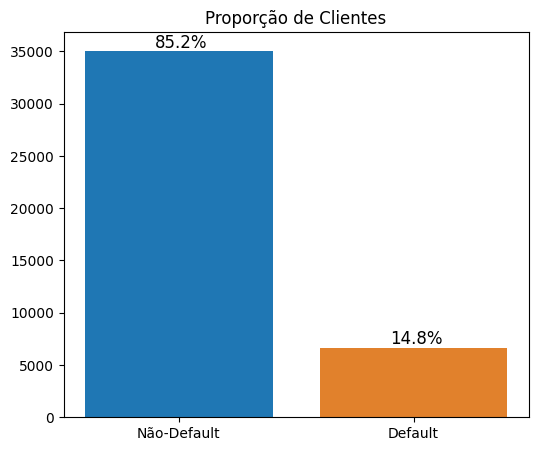

In [16]:
#Verificando a distribuição de classes
fig, ax = plt.subplots(figsize=(6, 5))

#Setando os dados
labels = ['Não-Default', 'Default']
y = df['target_default'].value_counts()
colors = ['#1f77b4', '#e1812c']

ax.bar(labels, y, color=colors)
ax.text(-0.10, 35300, '85.2%', fontsize=12, color='black')
ax.text(0.9, 7000, '14.8%', fontsize=12, color="black")
ax.set_title('Proporção de Clientes')

plt.show()

Temos uma diferença, e muito grande! Podemos observar que cerca de 85% de nossos clientes são `Não-Default` ou seja, não foram inadimplentes. Já para os `Default` temos por volta de 15%, indicando que foram inadimplentes. Com essas informações sabemos que iremos precisar fazer um balanceamento de classes, para que nosso modelo seja o mais confiável possível.

Próximo passo é começar a fazermos as transformações necessárias.

## Transformações dos Dados

Nesta etapa, será feito todas as transformações e limpeza nos dados que apontei na etapa anterior, com o objetivo de melhorar a qualidade de nossos dados e obter melhores resultados ao final do projeto. E essas transformações serão:

* Excluir variáveis que não agregam valor
* Remover os valores nulos e alterar os dados de: `target_default` e `facebook_profile`
* Tratamento de valores ausentes
* Tratar a variável `email`
* Remover outliers de `income`

Acima listei todas as transformações que iremos fazer, além disso também se perceberem...não coloquei que irei balancear nossa classe de clientes inadimplentes, isso por que se trata de uma etapa relacioanda ao "Pré-Processamento dos Dados", onde é uma parte com o foco em adaptar melhor os dados para aplicarmos em nossos algoritmos.

Então vamos começar as limpezas e transformações:

Antes irei criar uma cópia de nosso dataframe original, caso queiramos voltar aos dados originais, conseguimos fazer sem dificuldades.

In [17]:
#Fazendo uma cópia do Dataframe original
df_clean = df.copy()

### 1. Excluir variáveis que não agregam valor

Aqui irei excluir algumas variáveis que não idicam nada e que serão informações desnessárias para nosso modelo. Essas variáveis são: *ids*, *profile_phone_number*, *target_fraud*, *external_data_provider_credit_checks_last_2_year*,
*channel*, *application_time_applied*.

In [18]:
#Excluindo variáveis
df_clean.drop(columns=['ids', 'profile_phone_number', 'target_fraud', 'external_data_provider_credit_checks_last_2_year',
              'channel', 'application_time_applied'], axis=1, inplace=True)

#Verificando
df_clean.head(2)

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,444,outlook.com,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,346,gmail.com,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...


### 2. Remover os valores nulos e alterar os dados de: `target_default` e `facebook_profile`

Agora irei remover os valores nulos das 2 variáveis acima, porém para cada um terei que fazer um tratamento específico para a remoção dos valores nulos.

- `target_default`: Irei remover todas as linhas onde os valores são nulos, pois esta é a variável mais importante para nosso modelo, então não posso assumir qualquer valor apenas substituir o nulo, então por isso irei remover as linhas.

- `facebook_profile`: Onde os valores forem nulos irei substituir por **False**, assumindo que onde os clientes não preencheram seja por que eles não possuem perfil no facebook.

Após essas mudanças, irei substituir os valores: **False** por **0** e **True** por **1**, e após isso irei alterar o tipo para Bool. Assim finalizando nossas alterações nessas variáveis.

In [19]:
#Removendo os valores nulos
df_clean = df_clean.dropna(subset=['target_default'], axis=0)
df_clean['facebook_profile'].fillna(False, inplace=True)

### 3. Tratamento de valores ausentes

Aqui também teremos que dar uma atenção a mais para nossas variáveis e não apenas sair substituindo os valores:

* Para os atributos: `last_amount_borrowed`, `last_borrowed_in_months` e `n_issues` temos o seguinte raciocinio, se uma pessoa nunca pegou emprestimo podemos assumir que esse valor é nulo, logo o tempo em meses também pé nulo e o mesmo se aplicará para "n_issues". Por isso irei substituir esses valores por 0.

* Se nos lembrarmos bem, quando fizemos aquela tabela de estatística descritiva vimos que `reported_income` possuí valores como "inf", e `external_data_provider_email_seen_before` com valor mínimo -999, irei alterar esses 2 valores dessas 2 variáveis para nulos.

* Para as demais variáveis, irei fazer o tratamento de acordo com o seu tipo(objeto ou número) e para isso irei utilizar uma biblioteca do sckit-learn para nos auxiliar.


In [20]:
#Substituindo os valores por "0"
df_clean['last_amount_borrowed'].fillna(0, inplace=True)
df_clean['last_borrowed_in_months'].fillna(0, inplace=True)
df_clean['n_issues'].fillna(0, inplace=True)

In [21]:
#Substituindo os valores por Nan
df_clean['reported_income'].replace(np.inf, np.nan, inplace=True)
df_clean['external_data_provider_email_seen_before'].replace(-999, np.nan, inplace=True)

In [22]:
#Separando os tipos de dados
var_obj = df_clean.select_dtypes(include='object').columns
var_num = df_clean.select_dtypes(exclude='object').columns

#Removendo os valores nulos das variáveis categóricas
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_clean.loc[:, var_obj] = simple_imputer.fit_transform(df_clean.loc[:, var_obj])

#Removendo os valores nulos das variáveis numéricas
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df_clean.loc[:, var_num] = simple_imputer.fit_transform(df_clean.loc[:, var_num])

#Verificando
df_clean.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
reason                                             0
income                                             0
facebook_profile                                   0
state                                              0
zip                                                0
job_name                                           0
real_state                                         0
ok_since                                      

Para nossas variáveis categóricas coloquei como parâmetro para substituir os  nulos com os valores que mais aparecem nos dados, já para as variáveis numéricas coloquei para substituir utilizando a mediana, não utilizei a média pois ela é muito afetada por outliers e com certeza influenciaria nosso modelo de forma negativa.

### 4. Tratar a variável `email`

Como vimos mais acima, essa variáveil está com dados escritos errados e que significam a mesma coisa, como "gmaill.com" e "hotmaill.com" e a única coisa que está errada com essas palavras é que elas estão com um "l" a mais no final. Então iremos corrigir isso, para que nossos dados fique padrão.

In [23]:
#Alterando os valores de "email"
df_clean['email'].replace('gmaill.com', 'gmail.com', inplace=True)
df_clean['email'].replace('hotmaill.com', 'hotmail.com', inplace=True)

#Verificando
df_clean['email'].unique()

array(['outlook.com', 'gmail.com', 'spgov.com', 'hotmail.com'],
      dtype=object)

### 5. Remover outliers de `income`

Nessa etapa irei remover os valores extremos que estão influenciando nossa variável, e irei fazer isso exatamente como fiz lá em cima para plotarmos o boxplot, excluirei os 10 maiores valores porém agora será de uma forma fixa.

In [24]:
#Removendo os outliers
income_large_10 = df_clean.nlargest(n=10, columns='income')
df_clean.drop(income_large_10.index, inplace=True)

Perfeito! A parte de transformação dos dados está pronta, e podemos partir para o início da preparação para nossos modelos de Machine Learning, o que chamamos de Pré-Processamento, que consiste em fazermos mudanças que irão alterar a forma visual de nossos dados, mas mantendo seu valor intacto.

## Modelo de Machine Learning - Baseline

Aqui irei construir nosso primeiro algoritmo, que será o nosso baseline inicial. E o que isso significa? Basicamente que irei pegar um modelo sem nenhuma alteração e passar os nossos dados sem nenhum pré-processamento para ele. Isso para termos uma dimensão do resultado, e trabalharmos sempre em cima de buscar um resultado superior ao de um modelo básico.

Muita das vezes, nós cientistas de dados nos preocupamos muito com quais transformações serão essenciais para tornar o nosso modelo mais eficiente, e acabamos nos esquecendo de testar o mais simples de tudo.

<p align=center>
  <img src="https://raw.githubusercontent.com/ferreiramar96/Analise_Risco_de_Credito_Nubank/main/Imagens/baseline.png" width="60%">
</p>

<br>

Para esse nosso modelo de baseline irei utilizar o algoritmo de Árvore de Decisão, é um modelo básico e que costuma ser muito eficiente. Os dados que irei utilizar serão apenas os dados numéricos, para não ocorrer nenhum erro ao passarmos os mesmos para o modelo.

Logo mais irei transformar todos os dados que não são numéricos em numéricos, utilizando transformações de categorização, eai sim poderemos passar todas as variáveis.

A seguir irei fazer mais uma pequena mudança na variáveil `facebook_profile` para ficar no formato correto e nos ajudar na etapa seguinte.

In [25]:
df_clean['facebook_profile'].replace({1.0: True,  0.0: False}, inplace=True)
df_clean['facebook_profile'] = df_clean['facebook_profile'].astype('bool')

In [26]:
#Transformando em Bool
df_clean['target_default'] = df_clean['target_default'].astype(bool)

#Separando os dados
X = df_clean.select_dtypes(include='number')
y = df_clean['target_default']

#Separando os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
'''x_train = x_train.astype(float)
y_train = y_train.astype(bool)
x_test = x_test.astype(float)
y_test = y_test.astype(bool)'''

'x_train = x_train.astype(float)\ny_train = y_train.astype(bool)\nx_test = x_test.astype(float)\ny_test = y_test.astype(bool)'

In [27]:
#Treinando e fazendo a previsão com o modelo
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

Para este problema irei considerar a métrica **Recall** que mede a porcentagem que o seu modelo acertou em relação ao total de vezes que ele deveria ter acertado, ou seja True Positive com relação a soma dos TP + FN.

In [28]:
#Mostrando o resultado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.84      0.82      0.83      8777
        True       0.17      0.20      0.18      1656

    accuracy                           0.72     10433
   macro avg       0.51      0.51      0.51     10433
weighted avg       0.74      0.72      0.73     10433



Ótimo! Conseguimos um resultado de 20% com nosso modelo base, agora iremos trabalhar em cima desse valor, testar diversos algoritmos, fazer um pré-processamento completo, feature engineering, tunning de hiperparâmetros e por aí vai...

## Pré-Processamento dos Dados

<p align=center>
  <img src="https://raw.githubusercontent.com/ferreiramar96/Analise_Risco_de_Credito_Nubank/main/Imagens/pre_process.jpg" width="40%">
</p>


Anteriormente criamos nosso modelo base no qual conseguimos um *Recall* de 19%, então a partir de agora o nosso objetivo é trabalhar em cima de nossos dados afim de conseguirmos resultados melhores que esse. E como podemos fazer isso? através de um pré-processamento, e ele irá ter as seguintes fases nas seguinte ordem:


* Feature engineering
* Codificação das variáveis categóricas
* Separar em treino e teste
* Feature scaling
* Balanceamento de classes
* Redução de dimensionalidade (PCA)



Após realizar todas essas transformações nos dados, iremos testar diversos algoritmos e ver qual conseguimos um melhor resultado, e então fazer o tunning dos hiperparâmetros com o objetivo de melhorar ainda mais o nosso modelo e fazer com que ele seja capaz de fazer previsões mais precisas.

<br>

Antes, irei criar uma cópia dos dados:

In [29]:
#Fazendo uma cópia dos dados
df_pre = df_clean.copy()

### 1. Feature Engineering

Esta etapa consiste em utilizarmos nossa inteligência e conhecimentos sobre o negócio, cujo objetivo é criar novas variáveis que sejam capazes de agregar mais valor para o nosso algoritmo.

Irei fazer o feature enginner utilizando 2 variáveis de nosso conjunto de dados: `lat_lon` e `shipping_state`.

`lat_lon` - Irei separar em uma variáveis apenas para latitude e outra apenas para longitude.

`shipping_state` - Irei separar o código do país e os códigos dos estados, e como nosso código é de apenas 1 país...não vejo a nescessidade de termos essa variável, então irei excluir essa informação.

In [30]:
#Separando os dados de Latitude e Longitude
df_pre[['latitude', 'longitude']] = df_pre['lat_lon'].str.extract(r'\((.*), (.*)\)')
df_pre.drop(columns='lat_lon', inplace=True, axis=1)
df_pre[['latitude', 'longitude']].dtypes

latitude     object
longitude    object
dtype: object

Variáveis criadas, porém elas estão como "object" e precisamos converte-las para "float".

In [31]:
#Alterando o tipo
df_pre[['latitude', 'longitude']] = df_pre[['latitude', 'longitude']].astype(float).round(2)

Agora iremos separar os códigos dos estados, e como iremos excluir o sufixo "BR" pois só existe ele, irei fazer as modificações na mesma coluna e irei alterar o nome da coluna.

In [32]:
#Exluindo o sufixo "BR"
df_pre['shipping_state'] = df_pre['shipping_state'].str.replace('BR-', '')

#Renomeando a coluna
df_pre.rename(columns={'shipping_state': 'states'}, inplace=True)

E além de criar essas, irei excluir algumas variáveis que não como não sabemos o seu significado, não conseguimos deduzir algo sobre elas:

* `reason`
* `state`
* `zip`
* `job_name`
* `real_state`
* `external_data_provider_first_name`
* `profile_tags`
* `user_agent`

In [33]:
#Excluindo variáveis
df_pre.drop(['reason', 'state', 'zip', 'job_name', 'real_state',
               'external_data_provider_first_name', 'profile_tags', 'user_agent'],
              inplace=True, axis=1)

Agora sim! Nossa parte de feature engineering está pronta. Alterações fora feitas, novas features criadas e apagadas.

Irei criar mais uma cópia de nosso dataframe até aqui, pois mais a frente irei criar algumas hipóteses, e preciso que os dados estejam no formato original para isso.

In [34]:
#Fazendo a cópia do df
df_pre1 = df_pre.copy()

In [35]:
col_bool = df_pre.select_dtypes('bool')
col_bool

,target_default,facebook_profile
0,False,True
1,False,False
2,True,False
3,False,False
4,False,True
...,...,...
44995,False,False
44996,False,False
44997,False,False
44998,True,True


### 2. Codificação das variáveis categóricas

Aqui iremos codificar nossa variáveis que são categóricas ou seja, as variáveis do tipo "object". E essa codificação consisite em transformar os dados em numéricos, isso por que os modelos de machine learning conseguem obter um resultado melhor com todas as entradas sendo numéricas.

Existem modelos que conseguem se dar bem com os dados categóricos, como por exemplo: Árvore de Decisão, Suport Vector Machine e etc... Porém, elas se dão bem com os dados transformados, então iremos partir desse pressuposto.

In [36]:
#Codificação das variáveis Booleanas

#Selecionando as colunas
col_bool = df_pre.select_dtypes('bool')

#Aplicando a transformação
for col in col_bool:
  df_pre[col+'_encod'] = LabelEncoder().fit_transform(df_pre[col])
  df_pre.drop(col, axis=1, inplace=True)

Já apliquei as transformações em nossas variáveis booleanas, agora irei aplicar para as variáveis do tipo object. Uitlizarei o OneHotEncoder do sckitlearn.

In [37]:
#Codificação das variáveis Categóricas

#Selecionando as colunas
col_obj = df_pre.select_dtypes('object').columns

#Aplicando a transformação
dados_transform = df_pre[col_obj]
ohe = OneHotEncoder()
dados_transform = ohe.fit_transform(dados_transform).toarray()
feature_names = (ohe.get_feature_names_out(col_obj))

df_transform = pd.DataFrame(dados_transform, columns=feature_names)

In [38]:
#Concatenando os 2 dataframes
df_pre.drop(columns=col_obj, axis=1, inplace=True)
df_pre.reset_index(drop=True, inplace=True)
df_transform.reset_index(drop=True, inplace=True)
df_pre = pd.merge(df_pre, df_transform, left_index=True, right_index=True)

Finalmente com nossos dados codificados, se perceberem bem eu fiz 2 tratativas diferentes para os dados. Uma utilizando o *LabelEncoder* e a outra utilizando o *OneHotEncoder*, a seguir vou explicar a diferença de cada um deles:

* **LabelEncoder**: Esta função faz a codificação criando uma certa "ordem" entre os items, e essas ordens podem levar o modelo a conclusões que não são verdadeiras. Então aqui, neste problema em específico utilizei apenas para as variáveis que tinham apenas 2 valores, ou seja, os booleanos.

* **OneHotEncoder**: Para as demais variáveis utilizei esta função, porém existe o *get_dummies* do próprio pandas, mas quando vamos utilizar os dados para aplicar em uma modelo de machine learning, é recomendável utilizar o OneHotEncoder.

Próximo passo, será dividir nossos dados em treino e teste.

### 3. Separar os dados em Treino e Teste

Para criarmos modelos de machine learning, precisamos separar nossos dados em treino e teste. Que nada mais é, os dados de treino é o que iremos utilizar para treinar nossos modelos e faze-los identificar padrões nos dados, e os dados de teste serão utilizados para validarmos nossos modelos, para ver o quão bom e o quão preciso eles ficaram, e fazemos isso utilizando métricas específicas para cada caso.

A primeira parte consiste em separarmos quais serão as variáveis de X que chamamos de independentes e qual será nossa variável alvo(y) que chamamos de dependente.

Após separarmos, irei utilizar a função do *sklearn* que dividirá nossos dados em treino e teste, e para isso usaremos os seguintes critérios:

* 75% dos nossos dados serão para treino e 25% para teste
* Irei embaralhar nossos dados antes de separar em X e Y, pois pode ser que haja algum padrão que não detectei e possa influenciar no modelo.
* Irei utilizar nossa variável alvo como valor de *Stratify* que será para pegar a mesma porcentagem dos valores originais de nossos dados de nossa variável alvo.

Dito tudo isso, mão na massa:

In [39]:
#Embaralhando os dados
dados_emb = df_pre.reindex(np.random.permutation(df_pre.index))

#Separando em X e Y
X = dados_emb.drop(columns='target_default_encod')
y = dados_emb['target_default_encod']

In [40]:
#Separando em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    stratify=y, random_state=42)

#Verificando a quantidade
print(f'Quantidade de entradas para Treino: {X_train.shape[0]}')
print('---'*14)
print(f'Quantidade de entradas para Teste: {X_test.shape[0]}')

Quantidade de entradas para Treino: 31298
------------------------------------------
Quantidade de entradas para Teste: 10433


Com nossos dados já separados, irei utilizar os dados próximos passos serão, fazer o escalonamento de nossos dados e balanceamento de nossa variável alvo, porém essas 2 transformações irei fazer apenas em nossos dados de treino, para que quando formos avaliar os modelos, essas transformações não tenham causado um overfitting.

### 4. Feature Scaling

Essa é uma etapa que diria ser uma das principais, pois a partir do escalonamento das variáveis conseguimos melhorar e muito o desempenho e a convergência de nossos algoritmos, especialmente aqueles sensíveis à escala das variáveis.

E para que serve o escalonamento? Ele serve para colocar os dados em uma escala comparável. Os mais comuns são a `Padronização` e a `Normalização`.

* Normalização: Cada valor da variável é transformado de modo que o intervalo de valores esteja entre 0 e 1.

* Padronização: Cada valor da variável é transformado de modo que a média da variável seja 0 e o desvio padrão seja 1.

<br>

Podemos notar que ao falarmos de cada um eles podem parecer quase iguais, mas na prática são totalmente diferentes. Utilizamos a normalização quando nossos dados possuem quase nenhum ou nenhum outlier, pois seu range é entre 0 e 1, então se tivermos outliers extremos a normalização pode resultar em uma redução significativa da faixa de valores para a maioria dos dados.

Já na padronização é mais recomendado utilizar quando existem outliers, porém não extremos como vimos lá em cima em nosso dataset, porém já o tratamos. Porém ainda existem valores outliers, pois quando falamos de renda de clientes, concordam que teremos variádos tipos de clientes? Desde a classe mais baixa até a mais alta.

Então é por conta disso que iremos utilizar o `StandardScaler()` para esse problema.

Vale lembrar, que irei fazer o escalonamento apenas nos dados que foram separados em X (X_train e X_test).

In [41]:
#Aplicando o escalonamento
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

Sim! Apenas 3 linhas para aplicarmos a padronização, isso não é incrível?

### 5. Balanceamento de Classes

O balanceamento de classes é necessário quando uma ou mais classes têm um número muito maior ou menor de exemplos em comparação com outras classes. E como vimos lá em cima em nossas análises, em nossa variável alvo(target) temos: `85% dos clientes Não Default` e `15% sendo Default`, ou seja, nossa classe está extremamente desbalanceada.

E o que é esse balanceamento? Ele consiste em deixar a quantidade de cada classe iguais, ou bem próximas. Existem 2 técnicas para isso:

* `Oversampling` : Aumenta a quantidade de dados da classe minoritária sem remover ou reduzir exemplos da classe majoritária. A principal vantagem da sobreamostragem é que ela não descarta dados potencialmente úteis, mantendo a quantidade original de exemplos da classe majoritária. Já para a desvantagem temos o risco de overfitting, pois o modelo pode se tornar muito sensível a exemplos sintéticos ou replicados.

* `Undersampling`: Reduz a quantidade de dados da classe majoritária sem adicionar novos exemplos à classe minoritária. A principal vantagem da subamostragem é que ela reduz o risco de overfitting, pois o modelo é treinado em um conjunto de dados menor e menos desbalanceado. Já para a desvantagem temos que: informações potencialmente úteis são descartadas especialmente se houver classes minoritárias com exemplos importantes.

Após as explicações, irei utilizar o `UnderSampling` pois não quero que nosso modelo corra o risco de dar overfitting.

target_default_encod
0    4996
1    4996
Name: count, dtype: int64
----------------------------------------


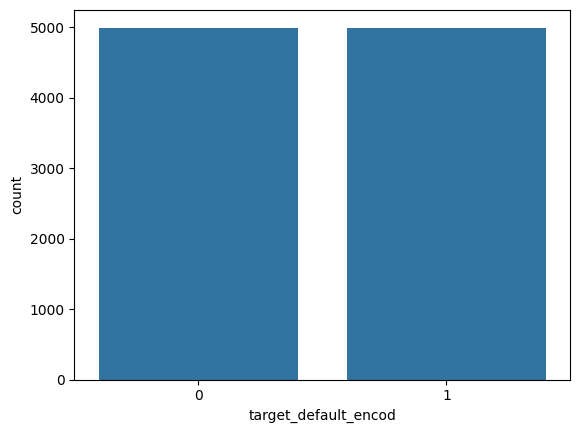

In [42]:
#Aplicando o balanceamento de classes
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

#Verificando o balanceamento
print(y_train.value_counts())
print("----"*10)

#Plotando o Countplot
sns.countplot(x=y_train)
plt.show()

Com nossos dados devidamente balanceados podemos dar sequência e ir para a última etapa do pré processamento.

### 6. Redução de Dimensionalidade (PCA)

Esta é uma etapa que é muito utilizada quando temos muitas variáveis, que é o nosso caso aqui, se tivessemos cerca de 25 a 30 variáveis poderiamos utilizar a técnica de *Feature Importance* que consiste em escolhermos as features que possuem uma maior relevância e então utiliza-las. Porém, como aqui temos 104 features fica um pouco mais complicado pois podemos perder informações. Dito isso, irei utilizar uma técnica chamada `PCA - Principal Component Analysis`.

<p align=center>
  <img src="https://raw.githubusercontent.com/ferreiramar96/Analise_Risco_de_Credito_Nubank/main/Imagens/Transformation-model-of-principal-component-analysis-PCA-7.png" width="75%">
</p>

E como funciona esse tal de PCA? Ele extrai um conjunto de recursos de baixa dimensão, fazendo uma projeção de dimensões irrelevantes de um conjunto de dados de alta dimensão com o objetivo de capturar o máximo de informações possível. Com menos variáveis obtidas, e ao mesmo tempo minimizando a perda de informações, a visualização também se torna muito mais significativa.

E por que o utilizamos? Como disse, ele serve para reduzirmos a quantidade de features, fazendo com que o conjunto de dados fique mais leve e torne o treinamento do algoritmo mais rápido. Além disso, em um conjunto de dados com muitas variáveis, acaba que existem várias que são irrelevantes e podem acabar causando até mesmo um overfitting.

Para aplicarmos precisamos estar com nossos dados padronizados, coisa que já fizemos em etapas anteriores a essa.

<br>

Mas devemos tomar cuidado, pois podemos perder muitas informações se utilizarmos de qualquer jeito. Vou fixar uma variância explicada de 95% que costuma ser o padrão, e o que isso significa? Que 95% de nossos dados são explicados pelas features selecionadas, um valor muito bom e pouca perda de informação.

E para descobrir qual é o número correto de features, irei aplicar o PCA sem definir quantos *Componentes Principais* vou querer. Depois vou pegar a variância explicada de cada feature e plotar um gráfico com a soma cumulativa para ver com quantas features conseguimos explicar 95% dos dados,  e então novamente aplicar o PCA, porém agora especificando a quantidade de componentes.

Para uma variância explicada de 95%, teremos 84 componentes



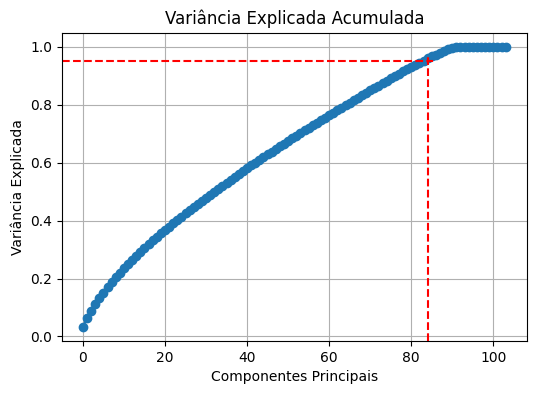

In [43]:
#Ajuste do PCA
pca = PCA()
pca.fit(X_train)

#Calcule a variância explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

#Calcule a variância explicada acumulada
cumulative_explained_variance = np.cumsum(explained_variance)
cpm = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Para uma variância explicada de 95%, teremos {cpm} componentes\n')

# Plote a variância explicada acumulada versus o número de componentes principais
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(cumulative_explained_variance, marker='o')
ax.set_xlabel('Componentes Principais')
ax.set_ylabel('Variância Explicada')
ax.set_title('Variância Explicada Acumulada')
ax.grid(True)

# Adicione a linha pontilhada
ax.axvline(x=cpm, color='red', linestyle='--', ymax=0.92)
ax.axhline(y=0.95, color='red', linestyle='--', xmin=0, xmax=(cpm - 1) / len(cumulative_explained_variance))

plt.show()

Podemos ver que para uma variância explicada de 95%, teremos 84 componentes. E isso já está excelente pois saímos de 104 para 84, uma diminuição de cerca de 22%. Com certeza nosso modelo treinará mais rapidamente.

Mas vale lembrar que, vou testar os modelos com os dados que foram aplicados o PCA e com os normais, e ver qual terá o melhor desempenho.

In [44]:
#Aplicando o PCA para redução de 84 componentes
pca = PCA(n_components=84)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Transformações feitas, aplicadas e salvas!

Próxima etapa, gostaria de inferir algumas hipóteses

## Hipóteses

Gostaria de criar algumas hipóteses para descobrirmos algumas informações a mais, antes de irmos de fato para a criação de nossos modelos. E as hipóteses são:

* A maioria dos clientes tem facebook
* Clientes com o email "spgov.com" tendem a ser menos inadimplentes que os outros
* Os canais de marketing que os clientes mais fizeram aplicações foram as redes sociais(facebook, twitter, intagram e linkedin)
* A região que mais possuí cliente é a Sudeste

São hipóteses bem simples, mas que são interessantes.

#### 1. A maioria dos clientes tem facebook

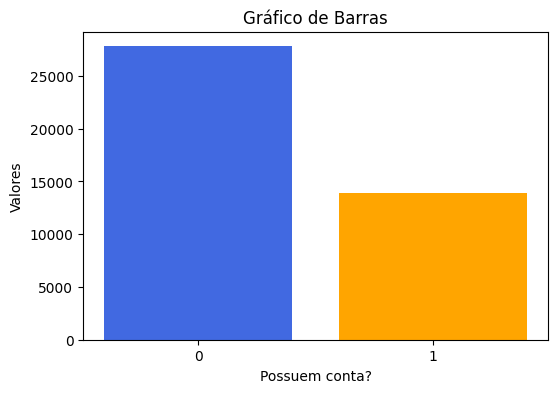

In [45]:
#Configurando os dados
fbook = pd.DataFrame(df_clean['facebook_profile'].value_counts())

#Criando o Axis
fig, ax = plt.subplots(figsize=(6,4))

#Configurações do gráfico
ax.bar(fbook.index, fbook['count'], color=['#4169E1', 'orange'])
ax.set_xlabel('Possuem conta?')
ax.set_ylabel('Valores')
ax.set_title('Gráfico de Barras')
ax.set_xticks(fbook.index)
plt.show()

Podemos ver que está hipótese é *FALSA*, a maioria de nossos clietes não possuem facebook.

#### 2. Clientes com o email `spgov.com`  tendem a ser menos inadimplentes que os outros

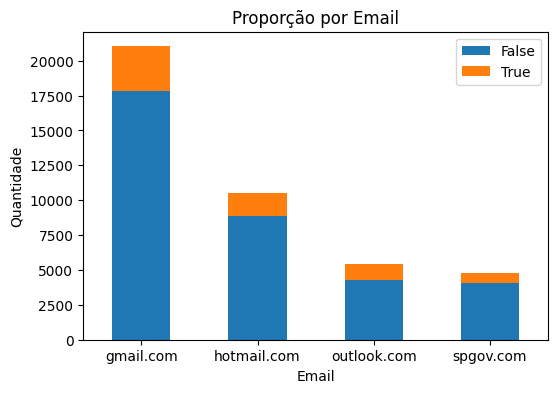

In [46]:
#Agrupando
grouped = df_clean.groupby(['email', 'target_default']).size().unstack()
grouped.plot(kind='bar', stacked=True, figsize=(6, 4))

#Configurações do gráfico
plt.legend(title='')
plt.title('Proporção por Email')
plt.xticks(rotation='horizontal')
plt.xlabel('Email')
plt.ylabel('Quantidade')

plt.show()

Ao observarmos o gráfico, podemos perceber que está hipótese é verdadeira em partes. Pois o tipo "spgov.com" é o tipo de email menos utilizado, então pode ser que se ele fosse mais utilizado ele não seria verdadeira, então ficamos como *Neutro* com relação a esta hipótese.

#### 3. Os canais de marketing que os clientes mais fizeram aplicações foram as redes sociais

Para rede sociais aqui, irei considerar os seguintes tipos de de canais de marketing: Facebook, Twitter, Instagram, LinkedIn e Website.

marketing_channel
Redes Sociais    25806
Demais Canais    15925
Name: count, dtype: int64


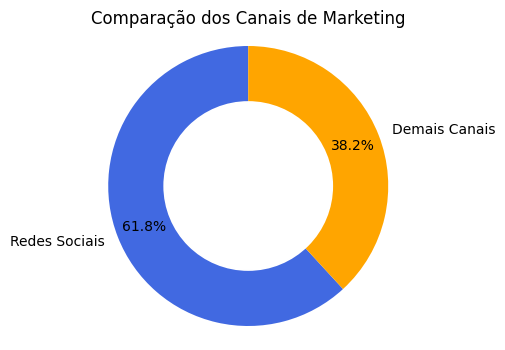

In [47]:
#Preparando os dados
canais_marketing = df_clean['marketing_channel'].copy()
canais_marketing.replace(['Facebook', 'Instagram', 'LinkedIn', 'Twitter', 'Website'], 'Redes Sociais', inplace=True)
canais_marketing.replace(['Invite-email', 'Radio-commercial', 'Waiting-list', 'Invite-web'], 'Demais Canais', inplace=True)
print(canais_marketing.value_counts())

lista_por = (canais_marketing.value_counts()/len(canais_marketing)*100).tolist()
lista_labels = (canais_marketing.unique()).tolist()
lista_labels.sort(reverse=True)

#Plotando o gráfico de rosca
color=['#4169E1', 'orange']
plt.figure(figsize=(6,4))
plt.pie(lista_por, labels=lista_labels, colors=color,autopct='%1.1f%%', startangle=90, pctdistance=0.80)

#Desenhando um círculo branco no centro para criar um buraco
centro_do_circulo = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centro_do_circulo)

plt.title('Comparação dos Canais de Marketing')
plt.axis('equal')
plt.show()

E nossa hipótese é *VERDADEIRA*, os canais que são considerados redes sociais são os mais utilizados. E isso pode ser tranquilamente explicado, pelo fato de atualmente muita das coisas serem descobertas através das mídias.

#### 4. A região que mais possuí cliente é a Sudeste

states
Norte           11467
Nordeste        11242
Sudeste          9108
Centro-Oeste     6188
Sul              3726
Name: count, dtype: int64


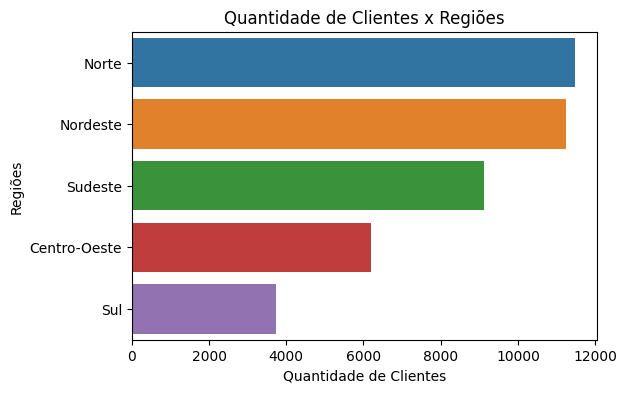

In [48]:
#Dicionário com a correspondência entre estados e regiões
estados_regioes = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte',
    'BA': 'Nordeste', 'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste',
    'GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul','RO': 'Norte',
    'RR': 'Norte', 'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'}

#Configurando os dados
df_regioes = df_pre1.copy()
df_regioes.replace(estados_regioes, inplace=True)
print(df_regioes['states'].value_counts())

#Plotando o gráfico
plt.figure(figsize=(6, 4))
sns.countplot(df_regioes['states'], palette='tab10',
              order = df_regioes['states'].value_counts().index)

#Configurações do gráfico
plt.title('Quantidade de Clientes x Regiões')
plt.ylabel('Regiões')
plt.xlabel('Quantidade de Clientes')
plt.show()

Esta hipótese é FALSA, conseguimos observar que o Sudeste é a 3ª maior região com 9108 clientes, sendo em 1ª a região norte com 11467 clientes, ficando muito próximo da região Nordeste com 11242 clientes.  

## Machine Learning

Agora chegamos em uma parte muito interessante, afinal...todas essas transformações e pré-processamentos foram feitas para esta etapa. Aqui irei testar alguns algoritmos, e o que melhor se desempenhar irei fazer o tunning de seus hiperparâmetros. Que são basicamente parâmetros que conseguimos ajustar com a finalidade de obtermos melhores resultados e um modelo robusto.

<p align=center>
  <img src="https://raw.githubusercontent.com/ferreiramar96/Analise_Risco_de_Credito_Nubank/main/Imagens/machine_learning.png" width="70%">
</p>

Como já dito anteriormente, para este projeto de análise de risco de crédito temos um problema de classificação que consiste em criar um modelo que consiga prever se um cliente tende a ser *Default* ou não. Lembrando que lá em cima construí nosso *modelo base que conseguimos um recall de 20%*, então a partir desse valor qualquer modelo já será mais eficiente que nosso ponta pé inicial.

Irei testar os seguintes algoritmos:

* Regressão Logística
* K-nearest neighbors(KNN)
* Suport Vector Machine(SVC)
* Random Forest
* Gradient Descent
* Decision Tree
* Naive Bayes
* XGBoost
* LGBMboost

E como farei pra testar todos esses algoritmos? Vou criar uma função que irá utilizar a validação cruzada e a média dos valores se baseando na métrica *Recall*, pois será ela que irei utilizar para saber o quão "bom" nosso modelo está.

### Função - Validação dos Modelos

In [49]:
def validacao_modelos(modelo, X, y, validacao=False):

  #Definir a semente para reprodutibilidade
  random_state_seed = 42
  np.random.seed(random_state_seed)

  #Aplicando a validação cruzada
  val_cruz = cross_val_score(modelo, X, y, scoring='recall', cv=5)

  #Imprime a validação com sucesso
  if validacao == True:
    nome_modelo = model.__class__.__name__
    print(f'{nome_modelo} - Validado com Sucesso')

  #Valor a retornar
  return round(val_cruz.mean(), 4)

Acima criei a função que irá aplicar a validação cruzada em cada modelo. E o que cada parâmetro significa?

* modelo --> O algoritmo de machine learning
* X --> Os dados de treino de X
* y --> Os dados de treino de y
* validacao --> Se irá imprimir a validação com sucesso ou não

A seguir vou instanciar nossos algoritmos e criar um loop for, para aplicar cada modelo à função de validação. E para isso, irei criar algumas listas com o objetivo de armazenar os recalls e os nomes dos modelos.

Vale lembrar também, que irei fazer 2 treinamentos...uma para os dados com as transformações padrões e um com os dados que apliquei o PCA, para conseguirmos ter uma dimensão se a redução de dimensionalidade teve um impacto positivo ou não.

In [50]:
#Instanciando os modelos
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
rf = RandomForestClassifier()
sgdc = SGDClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()
xgb = XGBClassifier()
lgbm = LGBMClassifier(verbosity=0)

#Criando as listas necessárias
modelos = [lr, knn, svc, rf, sgdc, dt, nb, xgb, lgbm]
nome_modelos = []
recall_modelos = []
recall_pca_modelos = []

for model in modelos:

  #Armazenando o nome dos modelos
  nome_modelos.append(model.__class__.__name__)

  #Armazenando o recall
  recall_modelos.append(validacao_modelos(model, X_train, y_train))

  #Armazenando o recall com os dados PCA
  recall_pca_modelos.append(validacao_modelos(model, X_train_pca, y_train, True))

LogisticRegression - Validado com Sucesso
KNeighborsClassifier - Validado com Sucesso
SVC - Validado com Sucesso
RandomForestClassifier - Validado com Sucesso
SGDClassifier - Validado com Sucesso
DecisionTreeClassifier - Validado com Sucesso
GaussianNB - Validado com Sucesso
XGBClassifier - Validado com Sucesso
LGBMClassifier - Validado com Sucesso


Com todos os modelos validados com sucesso, agora construirei um Dataframe para conseguirmos comparar quais são os melhores modelos e quais dados melhor se performaram.

In [51]:
#Transformando os resultados em DataFrame
dict_models = {'Modelos': nome_modelos, 'Recall': recall_modelos, 'Recall PCA': recall_pca_modelos}
recall_models = pd.DataFrame(dict_models).set_index('Modelos').sort_values(by='Recall', ascending=False)

#Mostrando os resultados
recall_models

,Recall,Recall PCA
Modelos,,
LogisticRegression,0.6567,0.6507
LGBMClassifier,0.6541,0.6347
RandomForestClassifier,0.6465,0.6247
SVC,0.6403,0.6341
XGBClassifier,0.6367,0.6091
DecisionTreeClassifier,0.5825,0.5550
SGDClassifier,0.5778,0.6019
KNeighborsClassifier,0.5773,0.5689
GaussianNB,0.3467,0.2964


Observando nossa tabela de resultados, podemos ver que os algoritmos que conseguiram obter os **melhores resultados** foram: `Random Forest`, `Logistic Regression` e `LGBMClassifier`, ambos com um recall de 65%. Algo que podemos notar também, é que os dados que foram aplicados o PCA obtiveram um resultado menor, cerca de 2% a 3%. Que quando tratamos de um problema real, um modelo que tem essa diferença é algo muito grande, então para esse problema a redução de dimensionalidade não foi tão eficiente para nossos modelos.

O único algoritmo que melhorou seu desempenho foi o *GaussianBN (Naive Bayes)*, porém ele foi o algoritmo que obteve o pior desempenho com quase 20% e com os dados do PCA, foi para 25%. O que sim é uma ótima melhora, mas infelizmente foi o pior algoritmo.


Como os melhores algoritmos tiveram quase que o mesmo resultado de 65%, irei escolher os 3 para fazer o tunning de hiperparâmetros e então ver qual irá obter um melhor desempenho.

## Tunning de Hiperparâmetros

Os hiperparâmetros são variáveis de configuração externas para gerenciar o treinamento do modelo de machine learning. São definidos manualmente antes de treinar um modelo. Eles são diferentes dos parâmetros, que são parâmetros internos derivados automaticamente durante o processo de aprendizado e não definidos manualemte.

Os hiperparâmetros controlam diretamente a estrutura, a função e a performance do modelo. O ajuste de hiperparâmetro nos permite ajustar o desempenho do modelo para resultados ideais. Esse processo é uma parte essencial, e a escolha de valores de hiperparâmetros apropriados é crucial para o sucesso. E como iremos fazer esse ajuste de hiperparâmetros? Simples, irei utilizar a seguinte função do *sklearn*

<br>

* `Grid Search`: Com o grid search, especificamos uma lista de hiperparâmetros e uma métrica de desempenho(por exemplo o recall), e o algoritmo trabalha com todas as combinações possíveis para determinar o melhor ajuste.

<br>

E como dito anteriormente, irei fazer os ajuste dos seguintes algoritmos: `Logistic Regression`, `Random Forest` e `LGBMClassifier`. Então mão na massa:

### Regressão Logística

 A Regressão Logística é uma técnica de análise de dados que usa matemática para encontrar as relações entre dois fatores de dados. Em seguida, essa relação é usada para prever o valor de um desses fatores com base no outro. A previsão geralmente tem um número finito de resultados, como sim(1) ou não(0).

 <p align=center>
  <img src="https://raw.githubusercontent.com/ferreiramar96/Analise_Risco_de_Credito_Nubank/main/Imagens/REGRESSAO-LOGISTICA-3.png" width="50%">
</p>

 É um excelente modelo para ser usado quando nossa variável alvo possuí apenas 2 valores, os melhores benefícios de se utilizar esse algoritmo são: Simplicidade, Velocidade, Flexibilidade e Visibilidade. O cálculo da logistic regression é dada pela seguinte expressão:

 <p align=center>
  <img src="https://raw.githubusercontent.com/ferreiramar96/Analise_Risco_de_Credito_Nubank/main/Imagens/rl_expression.png" width="30%">
</p>

A Regressão Logística não possuí um hiperparâmetro crítico para ser tunado, a o ponto de ser algo que possa mudar muito o resultado, porém irei tunar os seguintes parâmetros:

* `solver`: Algoritmo a ser usado no problema de otimização
* `penalty`: Qual penalidade será utilizada
* `C`: Qual a força de regularização
* `max_iter`: Número máximo de iterações necessárias para os solucionadores convergirem

Como o Grid Search possuí uma alta complexidade computacional, irei treinar cada hiperparâmetro separado. E cada treinamento, irei passar os parâmetros treinados anteriormente

In [52]:
#Instanciando o modelo
lr = LogisticRegression(random_state=42)

#Definindo os hiperparâmetros a serem explorados
parametro_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                  'penalty': ['none', 'l1', 'l2', 'elasticnet']}

#Aplicando uma validação cruzada e mantendo os dados estratificados
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Setando a busca pelos melhores parâmetros
grid_search = GridSearchCV(lr, parametro_grid, n_jobs=-1, cv=kfold, scoring='recall')

#Aplicando a busca
resultado_grid = grid_search.fit(X_train, y_train)

#Mostrando o resultado
print(f'Melhor Resultados: {resultado_grid.best_score_:.4f} para {resultado_grid.best_params_}')

Melhor Resultados: 0.6573 para {'penalty': 'l1', 'solver': 'liblinear'}


Acima tunnei os parâmetros `solver` e `penalty` e encontrei os melhores, se observarmos o resultado veremos que não mudou quase nada pois o resultado original era 0.6567 e agora 0.6573. Porém vamos continuar, pois ainda falta 2 parâmetros.

In [53]:
#Instanciando o modelo
lr = LogisticRegression(random_state=42, penalty='l1', solver='liblinear')

#Definindo os hiperparâmetros a serem explorados
parametro_grid = { 'C': [100, 10, 1.0, 0.1, 0.01]}

#Aplicando uma validação cruzada e mantendo os dados estratificados
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Setando a busca pelos melhores parâmetros
grid_search = GridSearchCV(lr, parametro_grid, n_jobs=-1, cv=kfold, scoring='recall')

#Aplicando a busca
resultado_grid = grid_search.fit(X_train, y_train)

#Mostrando o resultado
print(f'Melhor Resultados: {resultado_grid.best_score_:.4f} para {resultado_grid.best_params_}')

Melhor Resultados: 0.6814 para {'C': 0.01}


Após tunarmos o `C` obtivemos uma excelente evolução de cerca de 3% a mais, obtentendo um recall de 0.6814. Agora vamos para o último

In [54]:
#Instanciando o modelo
lr = LogisticRegression(random_state=42, penalty='l1', solver='liblinear', C=0.01)

#Definindo os hiperparâmetros a serem explorados
parametro_grid = {'max_iter': range(0, 100, 20)}

#Aplicando uma validação cruzada e mantendo os dados estratificados
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Setando a busca pelos melhores parâmetros
grid_search = GridSearchCV(lr, parametro_grid, n_jobs=-1, cv=kfold, scoring='recall')

#Aplicando a busca
resultado_grid = grid_search.fit(X_train, y_train)

#Mostrando o resultado
print(f'Melhor Resultados: {resultado_grid.best_score_:.4f} para {resultado_grid.best_params_}')

Melhor Resultados: 0.6814 para {'max_iter': 20}


Agora depois de ter tunado o último hiperparâmetro `max_iter`, não conseguimos mais nenhuma evolução no resultado do modelo, ele foi exatamente igual ao passo anterior.

Agora que já testamos todos, vamos para a construção de nosso modelo final e fazer a predição com nossos dados de teste.

#### Treinando o Modelo Final - Regressão Logística

In [55]:
#Instanciando o modelo final da Regressão Logística com os melhores hiperparâmetros encontrados
lr = LogisticRegression(random_state=42, penalty='l1', solver='liblinear', C=0.01, max_iter=20)

#Treinar o modelo
lr.fit(X_train, y_train)

#Fazendo as previsões com os dados de teste
y_pred_lr = lr.predict(X_test)

#Pegando as probabilidades para obter o AUC
y_pred_proba_lr = lr.predict_proba(X_test)

Modelo completo, agora vamos avalia-lo com uma matriz de correlação, relatório de métricas de classificação e a curva ROC. E então chegar a algumas conclusões

                      Relatório de Métricas                      
-----------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9137    0.6413    0.7537      8768
           1     0.2650    0.6811    0.3816      1665

    accuracy                         0.6477     10433
   macro avg     0.5894    0.6612    0.5676     10433
weighted avg     0.8102    0.6477    0.6943     10433

---------------
AUC: 0.7135 
-----------------------------------------------------------------


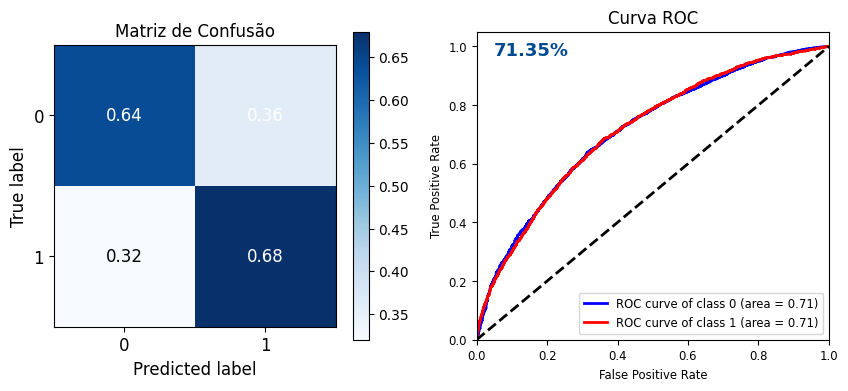

In [56]:
# imprimir relatório de métricas de avaliação
print('Relatório de Métricas'.center(65) + ('\n') + ('-' * 65))
print(classification_report(y_test, y_pred_lr, digits=4) + ('\n') + ('-' * 15))

# imprimir AUC
print('AUC: {:.4f} \n'.format(roc_auc_score(y_test, y_pred_proba_lr[:, 1], )) + ('-' * 65))

# plotar gráficos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

#Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr, normalize=True, title='Matriz de Confusão', text_fontsize='large', ax=ax[0])

# AUC
skplt.metrics.plot_roc(y_test, y_pred_proba_lr, title='Curva ROC', cmap='brg', text_fontsize='small', plot_macro=False, plot_micro=False, ax=ax[1])

### imprimir valor AUC
auc = (roc_auc_score(y_test, y_pred_proba_lr[:, 1]) * 100).round(2)
ax[1].text(0.05, 0.97, f'{auc}%', fontsize=13, color='#004a8f', fontweight='bold')

plt.show()

Após análisar as métricas acima, podemos concluir que conseguimos obter um resultado bom quando comparado com os dados de treino, onde tinhamos um resultado inicial de 65%. Com esse modelo, podemos dizer que dos dados que temos nosso modelo conseguiu prever 68% dos clientes que Default que realmente eram Default, errando cerca de 32%.

A seguir vamos para nosso modelo de Random Forest, e seguirei os mesmos passos da Regresão Logística, tanto para o tunning quanto para a avaliação do modelo final.

### Random Forest

Random Forest é um algoritmo que pertence à categoria de métodos de ensemble. Ensemble learning envolve a combinação de múltiplos modelos de decision tree para melhorar a robustez e o desempenho preditivo em comparação com modelos individuais, é mais comum obtermos um melhor resultado utilizando-o.

 <p align=center>
  <img src="https://raw.githubusercontent.com/ferreiramar96/Analise_Risco_de_Credito_Nubank/main/Imagens/random_forest.png" width="50%">
</p>

O random forest como já dito anteriormente é um modelo bastante robusto por natureza, abaixo listo alguns dos hiperparâmetros que irei tunar com o objetivo de conseguir um resultado melhor que o modelo base. Vamos lá:

* `bootstrap`: Indica se as amostras devem ser amostradas com substituição
* `max_depth`: Controla a profundidade máxima de cada árvore da floresta
* `max_features`: Número máximo de features a serem consideradas para dividir um nó
* `criterion`: Define a função para medir a qualidade de uma divisão
* `min_samples_leaf`: Número mínimo de amostras necessário para estar em um nó de folha
* `min_samples_split`: Número mínimo de amostras necessárias para dividir um nó interno
* `n_estimators`: Número de árvores da floresta

Treinarei de 2 em 2 hiperparâmetros por conta da complexidade computacional ser muito elevada.

In [57]:
#Instanciando o modelo
rf = RandomForestClassifier(random_state=42)

#Definindo os hiperparâmetros a serem explorados
parametro_grid = {'bootstrap': [True, False],
                  'max_depth': range(5, 50, 5)}

#Aplicando uma validação cruzada e mantendo os dados estratificados
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Setando a busca pelos melhores parâmetros
grid_search = GridSearchCV(rf, parametro_grid, n_jobs=-1, cv=kfold, scoring='recall')

#Aplicando a busca
resultado_grid = grid_search.fit(X_train, y_train)

#Mostrando o resultado
print(f'Melhor Resultados: {resultado_grid.best_score_:.4f} para {resultado_grid.best_params_}')

Melhor Resultados: 0.6637 para {'bootstrap': False, 'max_depth': 10}


Após otimizarmos os hiperparâmetros `booststrap` e `max_depth` saímos de um recall de 0.6465 para 0.6637, uma melhoria de quase 2% a mais. Uma boa melhora, agora continuemos com o ajuste fino.


In [58]:
#Instanciando o modelo
rf = RandomForestClassifier(random_state=42, bootstrap=False, max_depth=10)

#Definindo os hiperparâmetros a serem explorados
parametro_grid = {'max_features': ['auto', 'sqrt', 'log2'],
                  'min_samples_leaf': range(1, 6, 1)}

#Aplicando uma validação cruzada e mantendo os dados estratificados
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Setando a busca pelos melhores parâmetros
grid_search = GridSearchCV(rf, parametro_grid, n_jobs=-1, cv=kfold, scoring='recall')

#Aplicando a busca
resultado_grid = grid_search.fit(X_train, y_train)

#Mostrando o resultado
print(f'Melhor Resultados: {resultado_grid.best_score_:.4f} para {resultado_grid.best_params_}')

Melhor Resultados: 0.6671 para {'max_features': 'auto', 'min_samples_leaf': 3}


Depois de otimizar o `max_feature` e `min_samples_leaf` conseguimos uma pequena melhora de 0.0034, algo pouco mas que pode trazer uma melhora significativa, ou não...

In [59]:
#Instanciando o modelo
rf = RandomForestClassifier(random_state=42, bootstrap=False, max_depth=10, max_features='auto', min_samples_leaf=3)

#Definindo os hiperparâmetros a serem explorados
parametro_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
                  'min_samples_split': range(2, 10, 2)}

#Aplicando uma validação cruzada e mantendo os dados estratificados
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Setando a busca pelos melhores parâmetros
grid_search = GridSearchCV(rf, parametro_grid, n_jobs=-1, cv=kfold, scoring='recall')

#Aplicando a busca
resultado_grid = grid_search.fit(X_train, y_train)

#Mostrando o resultado
print(f'Melhor Resultados: {resultado_grid.best_score_:.4f} para {resultado_grid.best_params_}')

Melhor Resultados: 0.6679 para {'criterion': 'gini', 'min_samples_split': 8}


Agora, mais que anteriormente nossa melhora foi de 0.0008. Logo mais abaixo irei realizar um teste para sabermos se comparado com o recall original, esses ajustes trouxeram uma mudança de fato ou não.

In [60]:
#Instanciando o modelo
rf = RandomForestClassifier(random_state=42, bootstrap=False, max_depth=10, max_features='auto',
                            min_samples_leaf=3, criterion='gini', min_samples_split=8)

#Definindo os hiperparâmetros a serem explorados
parametro_grid = {'n_estimators': range(10, 100, 10)}

#Aplicando uma validação cruzada e mantendo os dados estratificados
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Setando a busca pelos melhores parâmetros
grid_search = GridSearchCV(rf, parametro_grid, n_jobs=-1, cv=kfold, scoring='recall')

#Aplicando a busca
resultado_grid = grid_search.fit(X_train, y_train)

#Mostrando o resultado
print(f'Melhor Resultados: {resultado_grid.best_score_:.4f} para {resultado_grid.best_params_}')

Melhor Resultados: 0.6695 para {'n_estimators': 40}


Para o ultimo hiperparâmetro `n_estimators`, mais uma vez conseguimos uma melhora bem pequena. Agora iremos realizar o treinamento e o predict, utilizando o Random Forest passando todos os hiperparâmetros com os melhores valores, e logo em seguida vamos avaliar.

#### Treinando o Modelo Final - Random Forest

In [61]:
#Instanciando o modelo final do Random Forest com os melhores hiperparâmetros encontrados
rf = RandomForestClassifier(random_state=42, bootstrap=False, max_depth=10, max_features='auto',
                            min_samples_leaf=3, criterion='gini', min_samples_split=8, n_estimators=40)

#Treinar o modelo
rf.fit(X_train, y_train)

#Fazendo as previsões com os dados de teste
y_pred_rf = rf.predict(X_test)

#Pegando as probabilidades para obter o AUC
y_pred_proba_rf = rf.predict_proba(X_test)

Modelo treinado! A agora vamos ver como ele se comportou com os nossos dados.

                      Relatório de Métricas                      
-----------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9165    0.6648    0.7706      8768
           1     0.2784    0.6811    0.3953      1665

    accuracy                         0.6674     10433
   macro avg     0.5975    0.6729    0.5829     10433
weighted avg     0.8147    0.6674    0.7107     10433

---------------
AUC: 0.7341 
-----------------------------------------------------------------


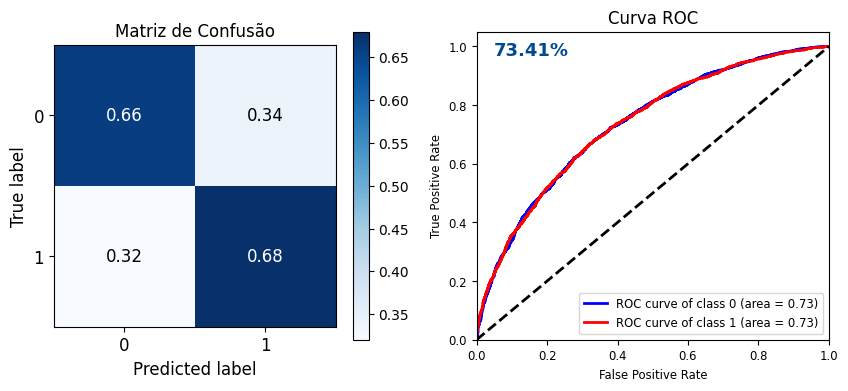

In [62]:
# imprimir relatório de métricas de avaliação
print('Relatório de Métricas'.center(65) + ('\n') + ('-' * 65))
print(classification_report(y_test, y_pred_rf, digits=4) + ('\n') + ('-' * 15))

# imprimir AUC
print('AUC: {:.4f} \n'.format(roc_auc_score(y_test, y_pred_proba_rf[:, 1], )) + ('-' * 65))

# plotar gráficos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

#Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, normalize=True, title='Matriz de Confusão', text_fontsize='large', ax=ax[0])

# AUC
skplt.metrics.plot_roc(y_test, y_pred_proba_rf, title='Curva ROC', cmap='brg', text_fontsize='small', plot_macro=False, plot_micro=False, ax=ax[1])

### imprimir valor AUC
auc = (roc_auc_score(y_test, y_pred_proba_rf[:, 1]) * 100).round(2)
ax[1].text(0.05, 0.97, f'{auc}%', fontsize=13, color='#004a8f', fontweight='bold')

plt.show()

Coincidência ou não, o nosso recall para os identificar corretamente os clientes Default foi exatamente igual ao da Regressão logística com 68.11%, porém para identificar os clintes Não-Default ele se saiu melhor com 66.48%, contra 64.13% da RL. E a outra métrica que estamos avaliando é a AUC(area under the curve), e nela conseguimos um resultado de 73.41% contra 71.35% da RL.

**Então até o momento, o melhor classificador foi o Random Forest**. Mas ainda vamos testar o LGBM que possuí algumas propriedades diferentes, e pode ser que ele se sai melhor que esse.

### LGBM Classifier

O LightGBM Classifier é uma implementação eficiente e poderosa de um algoritmo de aprendizado de máquina baseado em árvores de decisão assim como o random forest, desenvolvido pela Microsoft. Ele é especialmente projetado para trabalhar com grandes conjuntos de dados e é conhecido por sua velocidade e precisão em comparação com outros algoritmos de árvores de decisão.

 <p align=center>
  <img src="https://raw.githubusercontent.com/ferreiramar96/Analise_Risco_de_Credito_Nubank/main/Imagens/lightgbm.png" width="45%">
</p>

Ele pertence à família de algoritmos de gradient boosting, construindo modelos preditivos combinando várias árvores fracas em uma forte. Sua eficiência é notável devido à otimização para grandes conjuntos de dados e uso eficaz de memória, além da capacidade de paralelização em várias CPUs ou GPUs.

E como funciona um algoritmo boosting? Ele pega o modelo anterior e foca onde foram seus erros e reforça seu treinamento em cima deles, com o objetivo reduzi-los ao máximo. Ajustar seus hiperparâmetros é crucial para obter o melhor desempenho

Sabendo disso, irei tunar os seguintes:

* `num_leaves`: O número máximo de folhas em uma árvore
* `learning_rate`: A taxa de aprendizado determina o tamanho das etapas que o algoritmo dá ao atualizar os pesos dos modelos em cada iteração
* `max_depth`: A profundidade máxima de cada árvore de decisão. Controla a complexidade das árvores
* `min_data_in_leaf`: O número mínimo de amostras (ou dados) necessárias em cada folha. Isso pode ajudar a evitar sobreajuste, garantindo que cada folha tenha uma quantidade mínima de informações
* `bagging_fraction`: A fração de dados a serem amostrados aleatoriamente (sem substituição) para treinar cada árvore
* `bagging_freq`: A frequência de amostragem, ou seja, realizar o bagging a cada k iterações

Novamente irei treinar de 2 em 2 hiperparâmetros por conta da complexidade computacional ser muito elevada.

In [63]:
#Instanciando o modelo
lgbm = LGBMClassifier(random_state=42, verbosity=0)

#Definindo os hiperparâmetros a serem explorados
parametro_grid = {'num_leaves': range(0, 50, 5),
                  'learning_rate': [0.01, 0.05, 0.1, 1.0]}

#Aplicando uma validação cruzada e mantendo os dados estratificados
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Setando a busca pelos melhores parâmetros
grid_search = GridSearchCV(lgbm, parametro_grid, n_jobs=-1, cv=kfold, scoring='recall')

#Aplicando a busca
resultado_grid = grid_search.fit(X_train, y_train)

#Mostrando o resultado
print(f'Melhor Resultados: {resultado_grid.best_score_:.4f} para {resultado_grid.best_params_}')

Melhor Resultados: 0.6641 para {'learning_rate': 0.1, 'num_leaves': 5}


Após os primiros hiperparâmetros `num_leaves` e `learning_rate` conseguimos sair de um resultado de 0.6541 para 0.6641, uma boa melhora.

In [64]:
#Instanciando o modelo
lgbm = LGBMClassifier(random_state=42, verbosity=0, learning_rate=0.1, num_leaves=5)

#Definindo os hiperparâmetros a serem explorados
parametro_grid = {'max_depth': range(5, 30, 5),
                  'min_data_in_leaf': range(10, 100, 10)}

#Aplicando uma validação cruzada e mantendo os dados estratificados
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Setando a busca pelos melhores parâmetros
grid_search = GridSearchCV(lgbm, parametro_grid, n_jobs=-1, cv=kfold, scoring='recall')

#Aplicando a busca
resultado_grid = grid_search.fit(X_train, y_train)

#Mostrando o resultado
print(f'Melhor Resultados: {resultado_grid.best_score_:.4f} para {resultado_grid.best_params_}')

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
Melhor Resultados: 0.6659 para {'max_depth': 5, 'min_data_in_leaf': 50}


Próxima leva de tunning `max_depth` e `min_data_in_leaf` saímos de 0.6641 anteriormente para 0.6659, um pequeno aumento.

In [65]:
#Instanciando o modelo
lgbm = LGBMClassifier(random_state=42, verbosity=0, learning_rate=0.1, num_leaves=5, max_depth=5, min_data_in_leaf=50)

#Definindo os hiperparâmetros a serem explorados
parametro_grid = {'bagging_fraction': [0.2, 0.4, 0.6, 0.8, 1.0],
                  'bagging_freq': range(0, 11, 2)}

#Aplicando uma validação cruzada e mantendo os dados estratificados
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Setando a busca pelos melhores parâmetros
grid_search = GridSearchCV(lgbm, parametro_grid, n_jobs=-1, cv=kfold, scoring='recall')

#Aplicando a busca
resultado_grid = grid_search.fit(X_train, y_train)

#Mostrando o resultado
print(f'Melhor Resultados: {resultado_grid.best_score_:.4f} para {resultado_grid.best_params_}')

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
Melhor Resultados: 0.6695 para {'bagging_fraction': 0.6, 'bagging_freq': 4}


Finalizando os últimos 2 hiperparâmetros `bagging_fraction` e `bagging_freq` com um resultado final de tunning de 0.6695. Agora a próxima etapa é treinar o nosso modelo final passando todos os parâmetros e seus respectivos resultados obtidos nas células anteriores.

#### Treinando o Modelo Final - LGBM

In [66]:
#Instanciando o modelo final do LGBMClassifier com os melhores hiperparâmetros encontrados
lgbm = LGBMClassifier(random_state=42, verbosity=0, learning_rate=0.1, num_leaves=5, max_depth=5,
                      min_data_in_leaf=50, bagging_fraction=0.6, bagging_freq=4)

#Treinar o modelo
lgbm.fit(X_train, y_train)

#Fazendo as previsões com os dados de teste
y_pred_lgbm = lgbm.predict(X_test)

#Pegando as probabilidades para obter o AUC
y_pred_proba_lgbm = lgbm.predict_proba(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be igno

                      Relatório de Métricas                      
-----------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9214    0.6561    0.7665      8768
           1     0.2803    0.7051    0.4011      1665

    accuracy                         0.6640     10433
   macro avg     0.6008    0.6806    0.5838     10433
weighted avg     0.8191    0.6640    0.7081     10433

---------------
AUC: 0.7458 
-----------------------------------------------------------------


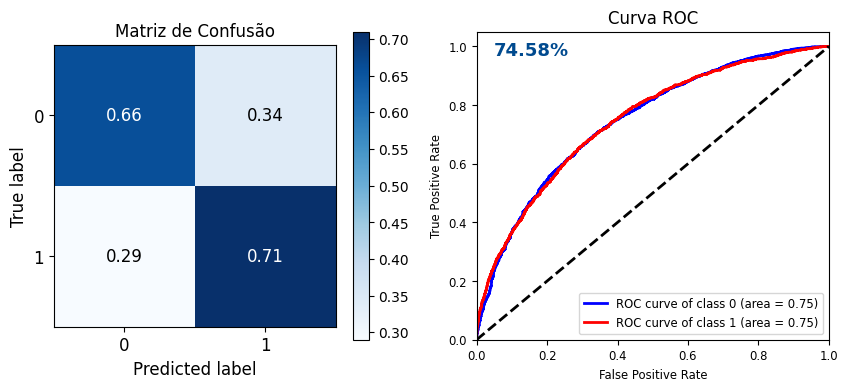

In [67]:
# imprimir relatório de métricas de avaliação
print('Relatório de Métricas'.center(65) + ('\n') + ('-' * 65))
print(classification_report(y_test, y_pred_lgbm, digits=4) + ('\n') + ('-' * 15))

# imprimir AUC
print('AUC: {:.4f} \n'.format(roc_auc_score(y_test, y_pred_proba_lgbm[:, 1], )) + ('-' * 65))

# plotar gráficos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

#Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lgbm, normalize=True, title='Matriz de Confusão', text_fontsize='large', ax=ax[0])

# AUC
skplt.metrics.plot_roc(y_test, y_pred_proba_lgbm, title='Curva ROC', cmap='brg', text_fontsize='small', plot_macro=False, plot_micro=False, ax=ax[1])

### imprimir valor AUC
auc = (roc_auc_score(y_test, y_pred_proba_lgbm[:, 1]) * 100).round(2)
ax[1].text(0.05, 0.97, f'{auc}%', fontsize=13, color='#004a8f', fontweight='bold')

plt.show()

Finalmente finalizado nosso modelo LGBM! E avaliando as métricas, conseguimos um resultado muito bom, melhor que os modelos anteriores. Utilizando o LightGBM e aprimorando seus hiperparâmetros, ***conseguimos obter um recall de 71%*** utilizando nossos dados de teste, e um AUC de 74.58% sendo o melhor entre os modelos anteriores. A seguir irei aplicar um teste estatístico, para ver se o tunning de hiperparâmetros obteve realmente uma melhora significativa, que irá nos indicar se o tempo que dedicamos a tunagem foi efetiva ou não.

## Teste Estatístico de Hipótese

O teste de hipóteses é uma ferramenta estatística poderosa que nos permite fazer inferências objetivas e baseadas em evidências sobre a população com base em uma amostra dos dados observados.

Como e por que irei utilizar esse teste? Por mais que tenhamos percebido um aumento numericamente de 5% em nosso modelo LightGBM (antes 0.6541, agora 0.7051) após aplicarmos o tunning de hiperparâmetros, irei aplicar um teste estatístico para comprovar se é uma melhora significativa ou não.

Existem 3 tipos de teste de hipóteses:

<br/>

* `Teste Z`: É usado principalmente quando se trabalha com uma grande amostra (geralmente com n maior que 30) e quando a variância populacional é conhecida.

* `Teste T`: O teste t é usado quando a variância populacional é desconhecida ou quando a amostra é pequena (geralmente com n menor que 30).

* `Teste F`: O teste F é usado principalmente em análise de variância (ANOVA) para comparar as médias de três ou mais grupos.

<br/>

Sabendo disso, irei utilizar o **Teste Z** pois temos uma maior quantidade de dados. Vamos considerar as seguintes hipóteses:

<br/>

* Hipótese Nula ($H_0$) ▶ $\text{p-value}>$ 0.05

  **Não há diferença significativa** no valor de Recall entre o modelo com e sem engenharia de atributos.

  <br>

* Hipótese Alternativa ($H_1$) ▶ $\text{p-value} <=$  0.05

  Rejeita a hipótese nula, ou seja, **existe diferença** entre os dois modelos avaliados.

<br/>

Em termos mais simples, o nível de significância (p-value) nos diz qual é a probabilidade de os resultados observados ocorrerem se a hipótese nula for verdadeira. Quanto menor o valor-p, mais forte é a evidência contra a hipótese nula.

Escolhi um de sigificância de 0.05(5%), é um valor comumente utilizado pois nos dá um intervalo de confiança de 95%. Se o p-value for menor que 0.05, então consideraremos rejeitar a hipótese nula, caso seja maior que 0.05 irei considerar que não existem evidências suficientes para rejeitar nossa hipótese nula, ou seja, que nosso modelo não obteve uma melhora significativa.

Vale lembrar que a fórmula do Teste Z é dado por:

$$ z_{\text{stat}} = \frac{{p1 - p2}}{{\sqrt{\frac{{p \cdot (1 - p) \cdot (1/n + 1/n)}}{{2}}}}} $$

Agora mãos à obra:


In [68]:
#Salvando os valores dos Recalls
reacall_ant = 0.6541
recall_dps = 0.6695

##Quantidade de clientes que foram avaliados
n_clients = X_train.shape[0]

#Quantidade de acertos de cada modelo
model_ant = int(reacall_ant * n_clients)
model_dps = int(recall_dps * n_clients)

#Função para calcular o teste z para duas proporções
def test_z(success_a, success_b, n_samples):

    #Calculando os parâmetros
    p1 = success_a / n_samples
    p2 = success_b / n_samples
    p = (success_a + success_b) / (2 * n_samples)

    #Definir fórmula do Z-test com o threshold de p = 0.05
    z_stat = (p1 - p2) / ((p * (1 - p) * (1/n_samples + 1/n_samples))**0.5)

    #Calculando o p-value
    p_val = (1 - norm.cdf(abs(z_stat))) * 2

    return z_stat, p_val

# aplicar a função aos modelos de machine-learning
z_stat = test_z(model_ant, model_dps, n_clients)
print(z_stat)

(-2.3025398915726196, 0.021304744471240644)


Conseguimos um p-value de aproximadamente ***0.021*** que é menor do que o nível de significância padrão de 0.05. Isso significa que há evidências estatísticas suficientes para rejeitar a hipótese nula e podemos considerar a hipótese alternativa, em outras palavras, **a diferença observada entre os modelos é estatisticamente significativa**.

O que podemos concluir é que, o ajuste de hiperparâmetro traz sim um resultado superior e significativo ao modelo original!

Vamos para as conclusões finais...

# Conclusão

Até compreender o problema de negócio, precisei dedicar um tempo para estudar sobre o que era Default e como tudo funcionava. Após ter compreendido o case do negócio, comecei a colocar a mão na massa onde as etapas técnicas do projeto que se seguiram foram: Importar os Dados, Realizar a Análise Exploratória, Transformações nos Dados, Fazer um Pré-Processamento com Técnicas pré machine learning, Fiz algumas suposições de negócios utilizando os Dados para responder a algumas perguntas, Modelos de Machine Learning, Tunning de Hiperparâmetros e um Teste Estatístico para finalizar.

A seguir irei discorrer um pouco sobre cada tema.

<br>

Comecei o projeto explicando como iria funcionar e qual seria o **nosso objetivo**, que era: *Criar um modelo de machine learning com o melhor desempenho possível, para classificar os clientes como um possível Default ou não.* Depois já fui para a importação dos dados onde os puxei de um repositório no GitHub, e também importei e instalei as bibliotecas que utilizei ao longo de todo o projeto. Vizualizei quais eram as dimensões do dataframe e criei um dicionário de variáveis, para a melhor compreensão do significado de cada variável.

<br>

 <p align=center>
  <img src="https://raw.githubusercontent.com/ferreiramar96/Analise_Risco_de_Credito_Nubank/main/Imagens/conclusion.jpg" width="35%">
</p>


<br>

Próxima parte, fui para a análise exploratória onde pude aprofundar mais ainda nos dados. Consegui verificar o quais eram os tipos das variáveis, identificar qual era a variável alvo(y), se existiam valores nulos, valores outliers, valores único, estatística descritiva e também aprofundei em algumas features que eram mais importantes, e então criei vários gráficos. Após essas análises, verifiquei que existiam algumas transformações pendentes que precisariam ser feitas, como: Alteração de tipo, tratamento de valores ausentes, remover outliers e excluir features que não agregavam valor algum.

<br>

Então começo a entrar na parte que diz respeito ao objetivo princial, que era um criar um modelo de Machine Learnin. Nessa parte crie um modelo base, com os dados "originais" sem nenhum pré-processamento e obti um resultado de 20% (recall) com um algoritmo de *Árvore de Decisão*, com esse valor em mente...iremos trabalhar para obter um valor acima desse, aplicando pré-processamentos, testanto diversos algoritmos e tunando seus hiperparâmetros, e assim fiz! No Pré-Processamento apliquei diversas técnicas, como: Feature Engineer, Codificação de Variáveis Categóricas, Feature Scaling, Balanceamento de Classes, Redução de Dimensionalidade(PCA) e Separar os dados em Treino e Teste. Depois de terminar essa etapa, ainda propus algumas hipóteses que acabei respondendo com os dados, algumas sendo verdadeiras e outrasnão.

<br>

Após todo esse Pré-Processamento robusto, testei diversos algoritmos, com o conjunto de dados com a dimensionalidade original (104 features) e com a dimensionalidade reduzida (84 features), dentre esses algoritmos, temos: *Regressão Logística*, *K-nearest neighbors(KNN)*, *Suport Vector Machine(SVC)*, *Random Forest*, *Gradient Descent*, *Árvore de Decisão*, *Naive Bayes*, *Xgboost* e *LightGBM*. E então fiz a validação com todos os modelos utilizando uma função que crie para isso e a métrica de avaliação que estou considerando é o *Recall*. Concluído a validação de todos os modelos, o primeiro ponto que observei foi qual conjunto de dados havia se performado melhor, e os *dados com as dimensões originais se sairam melhor*. Segundo, seria ver quais modelos obtiveram o melhor resultado, e os melhores foram: Regressão Logística, LightGBM e Random Forest, com os respectivos resultados: 65.67%, 65.41% e 64.65%. E o pior modelo sendo o KNN com um recall de 34.67%.

<br>

Escolhido os 3 melhores modelos, fui para a tunagem de hiperparâmetros com o objetivo de melhorar ainda mais nossos resultados e obter um modelo mais robusto. Em ambos consegui um resultado melhor:
* `Regressão Logística`: saindo de 65.67% para 68.14% e um modelo final com os dados de teste com 68.11% e um AUC ROC de 71.35%.

* `Random Forest`: saindo de 64.65% para 66.95% e um modelo final com os dados de teste com 68.11% e um AUC ROC de 73.41%.

* `LightGBM`: saindo de 65.41% para 66.95% e um modelo final com os dados de teste com 70.51% e um AUC ROC de 74.58%.

Após ter todos os resultados em mãos, resolvi aplicar um teste de hipótese (teste z), para saber se essa melhora nos valores após o ajuste de hiperparâmetros, possuí um nível de segnificância ou se foi uma melhora irrelevante. Utilizei um intervalo de confiança de 95%, e então como resultado obtive 2.1%, assim então consideramos a hipótese alternativa de que sim, essa melhora foi significativa. E com tudo isso podemos concluir que:

**Consegui construir um modelo de Machine Learning com um resultado de 71% para prever clientes Default utilizando o algoritmo LightGBM.**